In [13]:
using PyPlot

# Prox of nonnegative regularizer

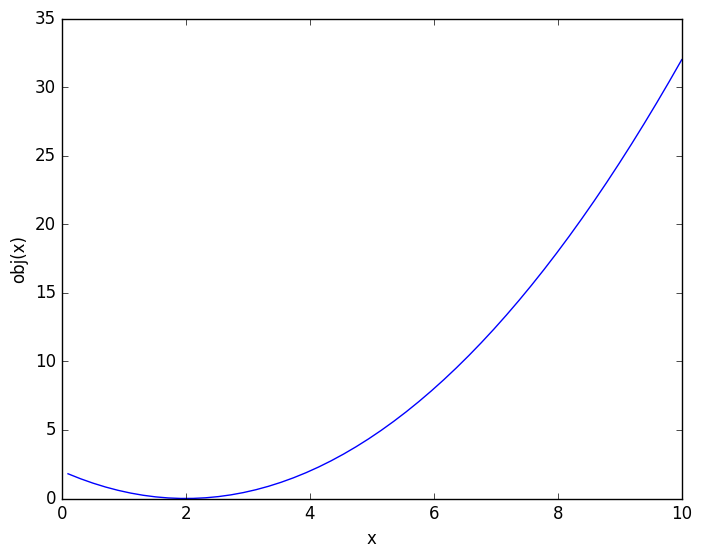

PyObject <matplotlib.text.Text object at 0x000000001B4B6668>

In [15]:
# prox of nonneg minimizes I(x>=0) + 1/2(x-z)^2
z = 2 # any number, wherever you want to evaluate it.
x = linspace(-10, 10, 100)
objx = [xi<0?Inf:0 + 1/2*(xi-z)^2 for xi in x]
plot(x, objx)
xlabel("x")
ylabel("obj(x)") # min is at x = 2 = z

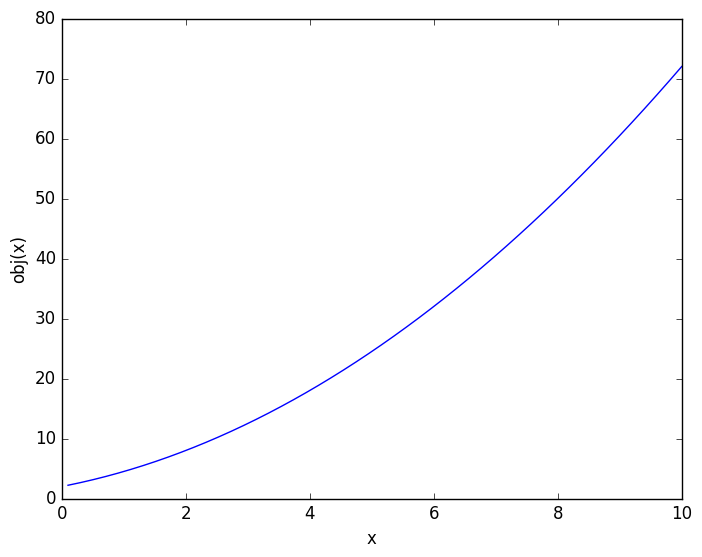

PyObject <matplotlib.text.Text object at 0x000000001A286A58>

In [17]:
# prox of nonneg minimizes I(x>=0) + 1/2(x-z)^2
z = -2 # any number, wherever you want to evaluate it.
x = linspace(-10, 10, 100)
objx = [xi<0?Inf:0 + 1/2*(xi-z)^2 for xi in x]
plot(x, objx)
xlabel("x") 
ylabel("obj(x)") # min is at x = 0 cuz z is negative

In [18]:
prox_nonneg(x) = max(0,x)

x = randn(2)
x /= norm(x) # l2 norm
@show x
px = prox_nonneg(x)
@show px

x = [0.995856,-0.0909467]
px = [0.995856,0.0]


2-element Array{Float64,1}:
 0.995856
 0.0     

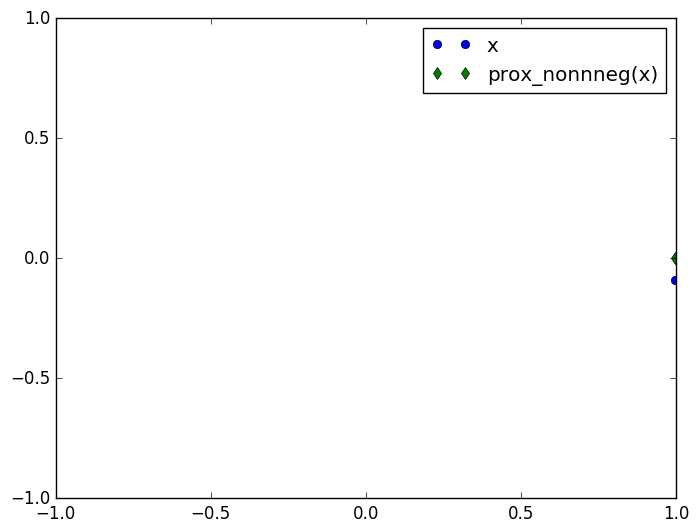

PyObject <matplotlib.legend.Legend object at 0x000000001B530668>

In [19]:
plot(x[1],x[2],"o",label="x")
plot(px[1],px[2],"d",label="prox_nonnneg(x)")
xlim([-1,1])
ylim([-1,1])
legend()

# Prox of l1 regularizer

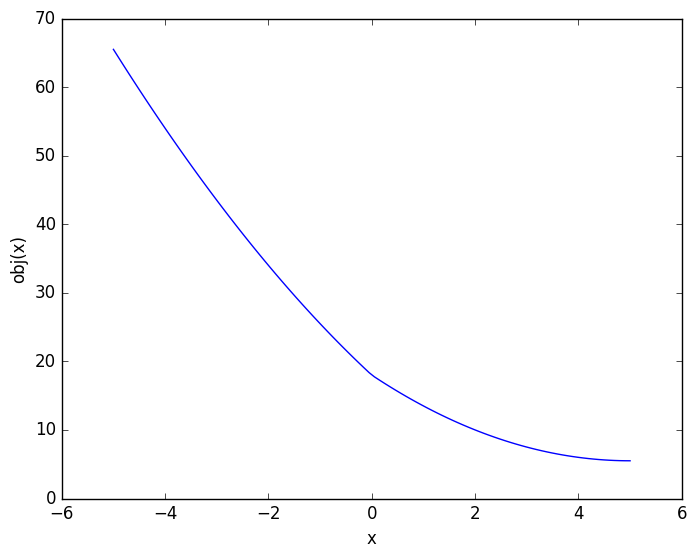

abs(4) + (1 / 2) * (4 - 6) ^ 2 = 6.0
abs(5) + (1 / 2) * (5 - 6) ^ 2 = 5.5
abs(6) + (1 / 2) * (6 - 6) ^ 2 = 6.0


6.0

In [20]:
# prox of l1 minimizes |x| + 1/2(x-z)^2
z = 6
x = linspace(-5, 5, 100)
objx = [abs(xi) + 1/2*(xi-z)^2 for xi in x]
plot(x, objx)
xlabel("x")
ylabel("obj(x)") # min is at x = 5 = z-1
@show abs(4)+1/2*(4-6)^2 #6
@show abs(5)+1/2*(5-6)^2 # 5
@show abs(6)+1/2*(6-6)^2 #6

In [21]:
function prox_l1(x::Number, alpha=1) #alpha is the regularisation term
    if x > alpha
        return x-alpha
    elseif x < -alpha
        return x + alpha
    else
        return 0
    end
end
function prox_l1(x::AbstractArray, alpha=1)
    
    
    return reshape(Float64[prox_l1(xi, alpha) for xi in x], size(x))
end

prox_l1 (generic function with 4 methods)

Number) in module Main at In[2]:2 overwritten at In[21]:2.


In [22]:
@show x = randn()
@show px = prox_l1(x);
@show y = randn(2,3)
@show py = prox_l1(y)

x = randn() = -0.0065989063936830634
px = prox_l1(x) = 0
y = randn(2,3) = [2.13956 -0.721622 0.366463; -0.996665 0.844363 2.28369]
py = prox_l1(y) = [1.13956 0.0 0.0; 0.0 0.0 1.28369]


2×3 Array{Float64,2}:
 1.13956  0.0  0.0    
 0.0      0.0  1.28369

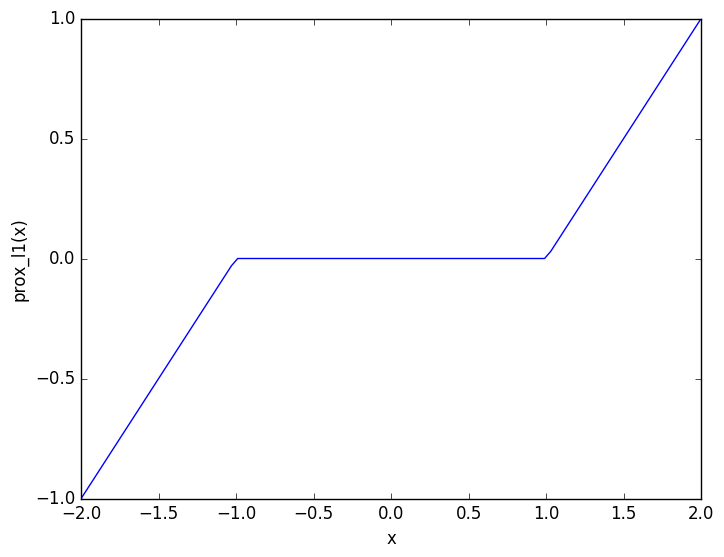

PyObject <matplotlib.text.Text object at 0x000000001B662390>

In [23]:
x = linspace(-2, 2, 100)
px = [prox_l1(xi) for xi in x]
plot(x, px)
xlabel("x")
ylabel("prox_l1(x)")

In [24]:
x = randn(2)
px = prox_l1(x);


In [25]:
@show x


x = [0.60693,0.611551]


2-element Array{Float64,1}:
 0.60693 
 0.611551

In [26]:
@show px
@show size(px)

px = [0.0,0.0]
size(px) = (2,)


(2,)

# proximal gradient method

$$\nabla \|Xw-y\|^2 = \nabla((Xw-y)^T (Xw-y)) = 2X^T(Xw-y)$$

In [27]:
# proximal gradient method for quadratic loss and l1 regularizer
function proxgrad_quad_l1(X, y; maxiters = 10, stepsize = 1, λ = 1, w = zeros(size(X,2)))
    objval = Float64[]
    for i=1:maxiters
        # gradient step
        g = 2X'*(X*w-y) # compute quadratic gradient
        w = w - stepsize*g
        # prox step
        w = prox_l1(w, stepsize*λ)
        # record objective value
        push!(objval, norm(X*w-y)^2 + norm(w,1)) # norm is default l2 unless stated otherwise
    end
    return w, objval
end

proxgrad_quad_l1 (generic function with 1 method)

) in module Main at In[9]:3 overwritten at In[27]:3.


let's solve the problem $$\text{minimize} \quad (y-w)^2 + |w|$$

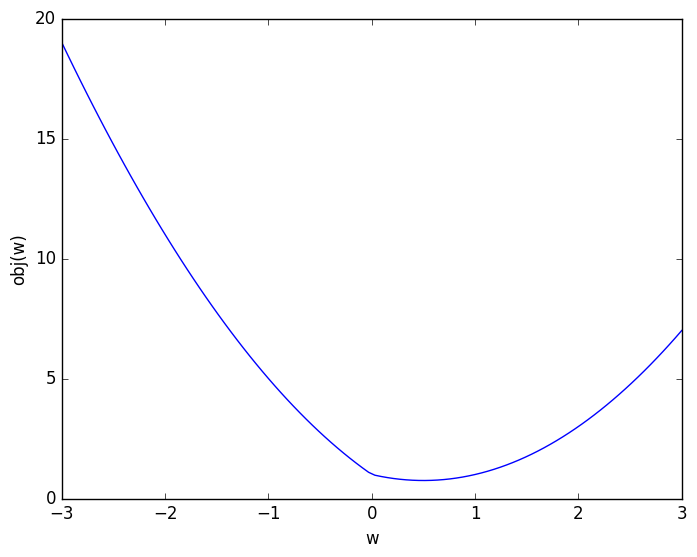

PyObject <matplotlib.text.Text object at 0x000000001B556048>

In [28]:
y = 1
wvec = linspace(-3, 3, 100)
objwvec = [(wi-y)^2 + abs(wi) for wi in wvec] # regularised
plot(wvec, objwvec)
xlabel("w")
ylabel("obj(w)")

In [29]:
w = -2 # start with some w

-2

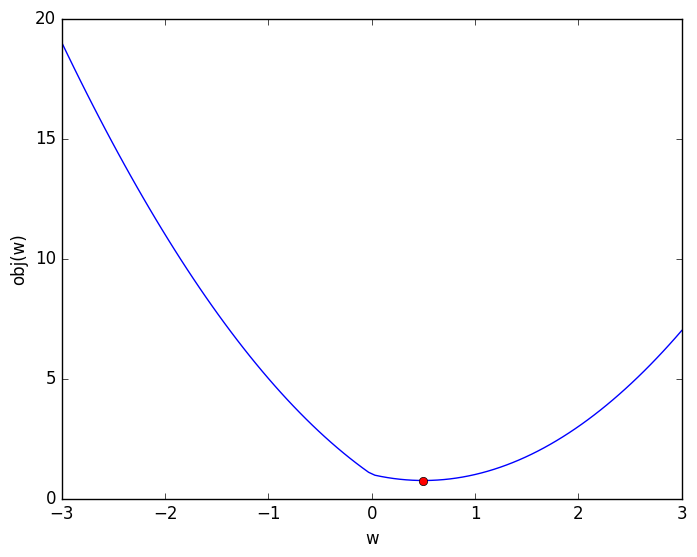

obj = [0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75]


1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000020CC6630>

In [35]:

    w, obj = proxgrad_quad_l1(ones(1,1), ones(1); maxiters = 10, stepsize = 0.5, w = w)
    @show obj

plot(wvec, objwvec)
xlabel("w")
ylabel("obj(w)")
plot(w, obj[end], "ro") # plot a single point

# play around with the step size
# run this code many times to see how the red dot moves (converges)

# Introduce LowRankModels

In [17]:
#Pkg.add("LowRankModels")

INFO: No packages to install, update or remove
INFO: Package database updated
INFO: METADATA is out-of-date — you may not have the latest version of LowRankModels
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [121]:
using LowRankModels

In [79]:
# loss function
loss = QuadLoss()
loss

LowRankModels.QuadLoss(1.0,LowRankModels.RealDomain())

In [80]:
# regularizers
lambda = 1

nonneg = NonNegConstraint()
l1 = OneReg(lambda)
l2 = QuadReg(lambda)

LowRankModels.QuadReg(1.0)

In [21]:
# the quad loss returns the sum of square differences between its first and second argument
evaluate(loss, 2., 3.)

1.0

In [22]:
evaluate(3*loss, 2., 3.)

LoadError: LoadError: MethodError: no method matching *(::Int64, ::LowRankModels.QuadLoss)
Closest candidates are:
  *(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:138
  *{T<:Union{Int128,Int16,Int32,Int64,Int8,UInt128,UInt16,UInt32,UInt64,UInt8}}(::T<:Union{Int128,Int16,Int32,Int64,Int8,UInt128,UInt16,UInt32,UInt64,UInt8}, !Matched::T<:Union{Int128,Int16,Int32,Int64,Int8,UInt128,UInt16,UInt32,UInt64,UInt8}) at int.jl:33
  *(::Real, !Matched::Complex{Bool}) at complex.jl:158
  ...
while loading In[22], in expression starting on line 1

In [6]:
evaluate(loss, [2., 2.], [3., 3.])

LoadError: LoadError: MethodError: no method matching evaluate(::LowRankModels.QuadLoss, ::Array{Float64,1}, ::Array{Float64,1})
Closest candidates are:
  evaluate(::LowRankModels.QuadLoss, !Matched::Float64, !Matched::Number) at C:\Users\User\.julia\v0.5\LowRankModels\src\losses.jl:90
  evaluate(!Matched::LowRankModels.QuadReg, ::AbstractArray{T,N}) at C:\Users\User\.julia\v0.5\LowRankModels\src\regularizers.jl:53
  evaluate(!Matched::LowRankModels.QuadConstraint, ::AbstractArray{T,N}) at C:\Users\User\.julia\v0.5\LowRankModels\src\regularizers.jl:69
  ...
while loading In[6], in expression starting on line 1

In [81]:
# can also evaluate the gradient wrt the first argument
grad(loss, 2., 0.)

4.0

In [109]:
grad(loss, 0., 2.)

-4.0

In [16]:
# can evaluate the proximal operator of the regularizer
prox(nonneg, 1)

LoadError: LoadError: MethodError: no method matching prox(::LowRankModels.NonNegConstraint, ::Int64)
Closest candidates are:
  prox(::LowRankModels.NonNegConstraint, !Matched::AbstractArray{T,N}, !Matched::Number) at C:\Users\User\.julia\v0.5\LowRankModels\src\regularizers.jl:94
while loading In[16], in expression starting on line 2

In [82]:
# can evaluate the proximal operator of lambda times the regularizer
λ = .1
prox(l1, 1, λ)

LoadError: LoadError: MethodError: no method matching prox(::LowRankModels.OneReg, ::Int64, ::Float64)
Closest candidates are:
  prox(::LowRankModels.OneReg, !Matched::AbstractArray{T,N}, ::Number) at C:\Users\User\.julia\v0.5\LowRankModels\src\regularizers.jl:78
  prox(!Matched::LowRankModels.QuadReg, !Matched::AbstractArray{T,N}, ::Number) at C:\Users\User\.julia\v0.5\LowRankModels\src\regularizers.jl:51
  prox(!Matched::LowRankModels.QuadConstraint, !Matched::AbstractArray{T,N}, ::Number) at C:\Users\User\.julia\v0.5\LowRankModels\src\regularizers.jl:67
  ...
while loading In[82], in expression starting on line 3

In [25]:
λ = .01
prox(l1, 1, λ)

0.99

In [26]:
# chain rule: 
# gradient of ||Xw - y||^2 wrt w is X' * <gradient of ||z-y||^2 wrt z>, 
# where z = X*w

In [83]:
import LowRankModels: evaluate, grad
evaluate(loss::Loss, X::Array{Float64,2}, w, y) = evaluate(loss, X*w, y)
grad(loss::Loss, X::Array{Float64,2}, w, y) = X'*grad(loss, X*w, y)

grad (generic function with 9 methods)

LowRankModels.Loss, Array{Float64, 2}, Any, Any) in module Main at In[31]:2 overwritten at In[83]:2.


In [111]:
# proximal gradient method
function proxgrad(loss, reg, X, y; maxiters = 10, stepsize = 1)
    w = zeros(size(X,2))
    objval = Float64[]
    
    for i=1:maxiters
        # gradient step
        g = grad(loss, X, w, y)
        w = w - stepsize*g
        # prox step
        w = prox(reg, w, stepsize)
        # record objective value
        push!(objval, evaluate(loss, X, w, y) + evaluate(reg, w))
    end
    
    return w, objval
end

proxgrad (generic function with 2 methods)

, Any, Any) in module Main at In[110]:3 overwritten at In[111]:3.


In [122]:
# proximal gradient method
function proxgrad(loss::Loss, reg::Regularizer, X, y;
                  maxiters::Int = 10, stepsize::Number = 1., 
                  ch::ConvergenceHistory = ConvergenceHistory("proxgrad"))
    
    w = zeros(size(X,2))
    for t=1:maxiters
        t0 = time()
        # gradient step
        g = grad(loss, X, w, y)
        w = w - stepsize*g
        # prox step
        w = prox(reg, w, stepsize)
        # record objective value
        update_ch!(ch, time() - t0, obj = evaluate(loss, X, w, y) + evaluate(reg, w))
    end
   
    return w
end

proxgrad (generic function with 2 methods)

, LowRankModels.Regularizer, Any, Any) in module Main at In[114]:5 overwritten at In[122]:6.


In [123]:
srand(0)  
X, y = rand(6,3), rand(6);

In [116]:
ch = ConvergenceHistory("NNLS")
w = proxgrad(QuadLoss(), NonNegConstraint(), X, y; 
             stepsize=.1, maxiters=50,
             ch = ch)

plot(ch.objective)
xlabel("iteration")
ylabel("objective")

"aaaa" = "aaaa"


LoadError: LoadError: MethodError: no method matching grad(::LowRankModels.QuadLoss, ::Array{Float64,1}, ::Array{Float64,1})
Closest candidates are:
  grad(::LowRankModels.Loss, !Matched::Array{Float64,2}, ::Any, !Matched::Any) at In[83]:3
  grad(::LowRankModels.QuadLoss, !Matched::Float64, !Matched::Number) at C:\Users\User\.julia\v0.5\LowRankModels\src\losses.jl:92
while loading In[116], in expression starting on line 2

In [87]:
semilogy(ch.objective - ch.objective[end])
xlabel("iteration")
ylabel("objective")

LoadError: LoadError: BoundsError: attempt to access 0-element Array{Float64,1} at index [0]
while loading In[87], in expression starting on line 1

# Let's generate some more data and test out these models

In [124]:
function generate_data(n, w)
    X = randn(n,length(w))
    y = X*w
    return X, y
end

function generate_noisy_data(n, w)
    X = randn(n,length(w))
    y = X*w + .1*randn(n)
    return X, y
end

generate_noisy_data (generic function with 1 method)

) in module Main at In[117]:2 overwritten at In[124]:2.


# let's compare different kinds of regularized regression

In [125]:
function ridge_regression(X,y; λ=1, kwargs...) # ellipsis: variable number of arguments

    w = proxgrad(QuadLoss(), λ*QuadReg(), X, y; kwargs...) # proxgrad(loss, reg, X, y; maxiters = 10, stepsize = 1)
    return w
end

ridge_regression (generic function with 1 method)

Any, Any) in module Main at In[118]:3 overwritten at In[125]:3.


In [126]:
function nnls(X,y; kwargs...)
    w = proxgrad(QuadLoss(), NonNegConstraint(), X, y; kwargs...)
    return w
end

nnls (generic function with 1 method)

Any, Any) in module Main at In[90]:2 overwritten at In[126]:2.


In [127]:
function lasso(X,y; λ=1, kwargs...)
    w = proxgrad(QuadLoss(), λ*OneReg(), X, y; kwargs...)
    return w
end

lasso (generic function with 1 method)

Any, Any) in module Main at In[91]:2 overwritten at In[127]:2.


In [128]:
# generate data

d = 30
w_randn = randn(d)
w_sparse = sprandn(d, .5) 
w_pos = sprand(d, .5);

# sprand: Create a random m by n sparse matrix, 
#in which the probability of any element being nonzero is independently given by p

w = w_pos

X, y = generate_noisy_data(30, w)

(
[-2.06216 -1.04361 … 2.51 0.493014; 0.246942 -1.67939 … -1.70603 0.152279; … ; -0.447924 -2.11102 … -0.628773 1.06545; 0.362531 1.21933 … 0.208612 1.11915],

[0.211505,-2.89382,-0.82731,1.89554,1.30355,-0.962532,-0.634707,-4.57862,-0.652612,0.269724  …  1.55374,3.74667,0.456801,-3.25407,-4.64504,-4.01834,1.62453,-2.41889,2.24196,1.88243])

In [129]:
maxiters = 100
stepsize = .01/norm(X)

w_ridge = ridge_regression(X,y, maxiters=maxiters, stepsize=stepsize)
w_nonneg = nnls(X,y, maxiters=maxiters, stepsize=stepsize)
w_lasso = lasso(X,y, maxiters=maxiters, stepsize=stepsize);

LoadError: LoadError: MethodError: no method matching *(::Int64, ::LowRankModels.QuadReg)
Closest candidates are:
  *(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:138
  *{T<:Union{Int128,Int16,Int32,Int64,Int8,UInt128,UInt16,UInt32,UInt64,UInt8}}(::T<:Union{Int128,Int16,Int32,Int64,Int8,UInt128,UInt16,UInt32,UInt64,UInt8}, !Matched::T<:Union{Int128,Int16,Int32,Int64,Int8,UInt128,UInt16,UInt32,UInt64,UInt8}) at int.jl:33
  *(::Real, !Matched::Complex{Bool}) at complex.jl:158
  ...
while loading In[129], in expression starting on line 4

In [94]:
plt[:hist](w_ridge)

LoadError: LoadError: UndefVarError: w_ridge not defined
while loading In[94], in expression starting on line 1

In [59]:
plt[:hist](w_lasso, bins=50)

LoadError: LoadError: UndefVarError: plt not defined
while loading In[59], in expression starting on line 1

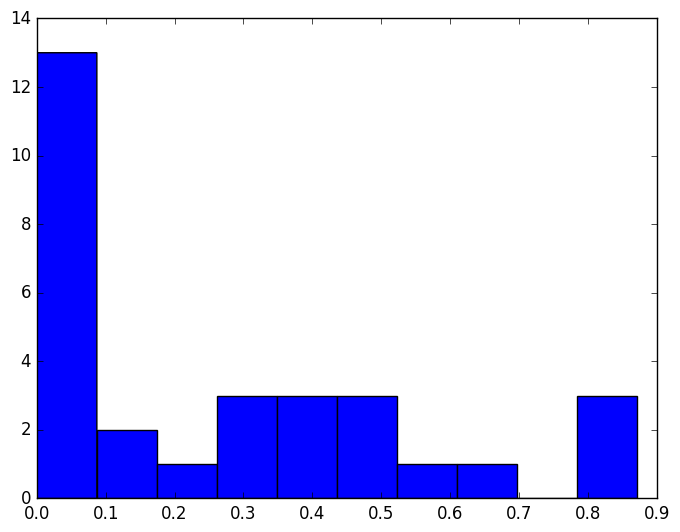

([13.0,2.0,1.0,3.0,3.0,3.0,1.0,1.0,0.0,3.0],[0.0,0.0871879,0.174376,0.261564,0.348751,0.435939,0.523127,0.610315,0.697503,0.784691,0.871879],Any[PyObject <matplotlib.patches.Rectangle object at 0x330677850>,PyObject <matplotlib.patches.Rectangle object at 0x330677ed0>,PyObject <matplotlib.patches.Rectangle object at 0x330684590>,PyObject <matplotlib.patches.Rectangle object at 0x330684c10>,PyObject <matplotlib.patches.Rectangle object at 0x3306902d0>,PyObject <matplotlib.patches.Rectangle object at 0x330690950>,PyObject <matplotlib.patches.Rectangle object at 0x330690fd0>,PyObject <matplotlib.patches.Rectangle object at 0x33069e690>,PyObject <matplotlib.patches.Rectangle object at 0x33069ed10>,PyObject <matplotlib.patches.Rectangle object at 0x3306ac3d0>])

In [103]:
plt[:hist](w_nonneg)

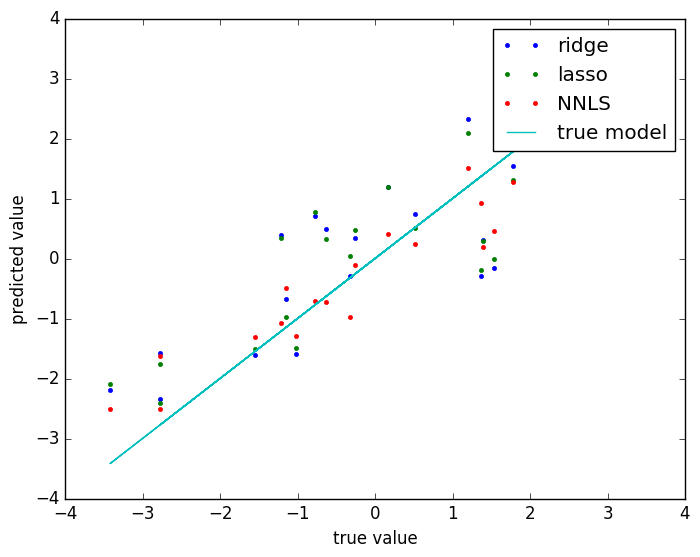

PyObject <matplotlib.text.Text object at 0x3306ac550>

In [104]:
# which fits data best?
Xtest,ytest = generate_data(20,w)

plot(ytest,Xtest*w_ridge,label="ridge",".")
plot(ytest,Xtest*w_lasso,label="lasso",".")
plot(ytest,Xtest*w_nonneg,label="NNLS",".")
plot(ytest,ytest,label="true model")
legend()
xlabel("true value")
ylabel("predicted value")

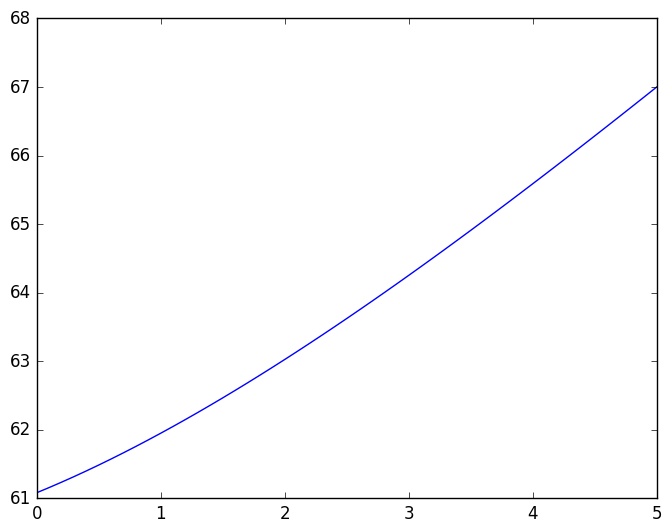

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x330d44f10>

In [106]:
# cross validate over lambda

w = .5*randn(40)
X,y = generate_noisy_data(30, w)
Xtest,ytest = generate_noisy_data(30, w)

error = Float64[]
λs = 0:.1:5
for λ in λs
    w = ridge_regression(X,y; λ=λ, maxiters=maxiters, stepsize=stepsize)
    push!(error, sum((ytest - Xtest*w).^2))
end
plot(λs, error)